**Name : Spandan Manoj Divate**

**College : P.E.S Modern College Of Engineering, Pune**

**Task 5 : Sales Prediction using Python**

**Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

**Load CSV file to pandas data frame**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Advertising.csv')

In [5]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


**Data Analysis**

In [6]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.shape

(200, 5)

In [8]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [10]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [11]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

**Data Visualization**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

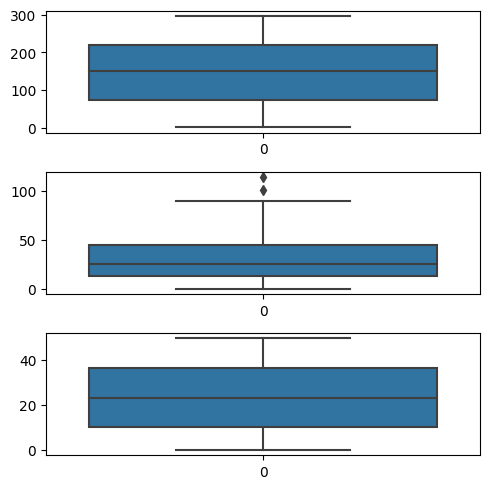

In [13]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<Axes: xlabel='Newspaper', ylabel='Density'>

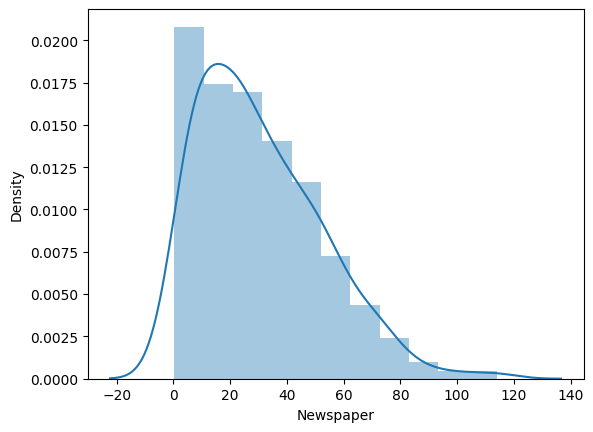

In [14]:
sns.distplot(df['Newspaper'])

In [15]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [16]:
lower_bridge = df['Newspaper'].quantile(0.25) - (iqr*1.5)
upper_bridge =df['Newspaper'].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [17]:
data =  df.copy()

In [18]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<Axes: >

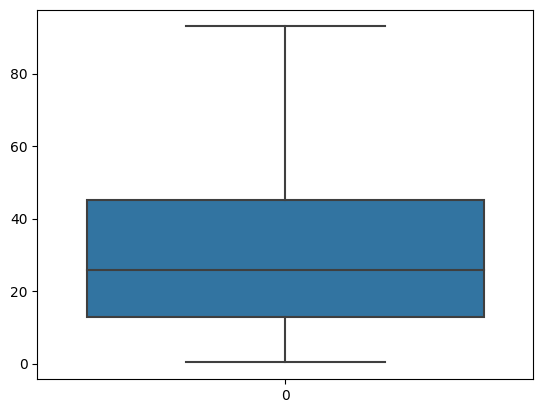

In [19]:
sns.boxplot(data['Newspaper'])

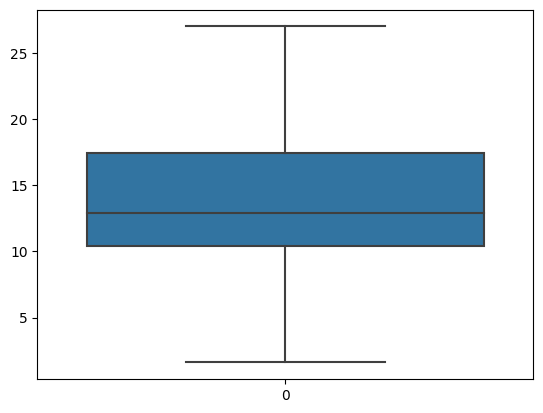

In [20]:
sns.boxplot(data['Sales']);

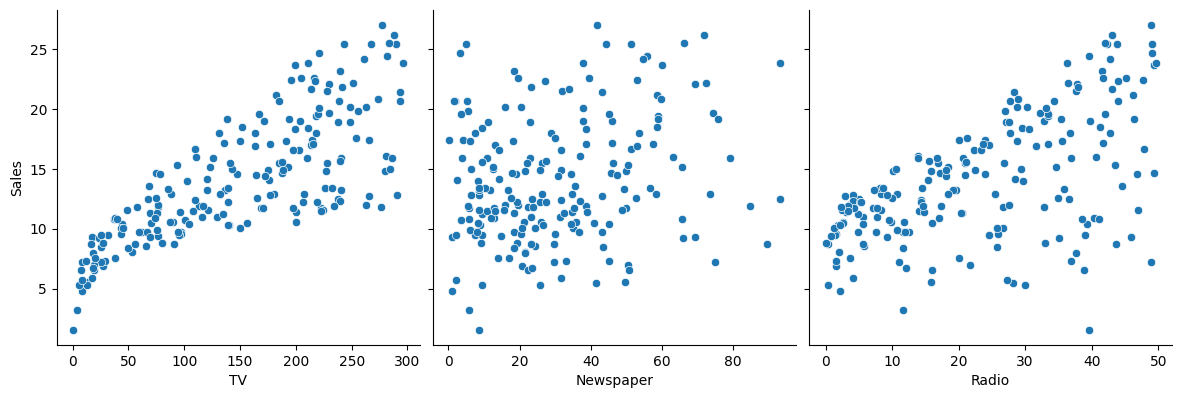

In [21]:
sns.pairplot(data, x_vars=['TV','Newspaper','Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

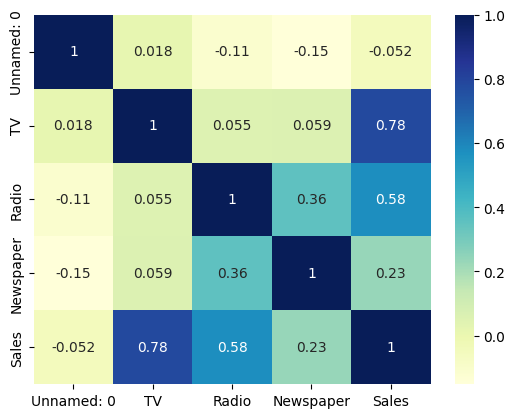

In [22]:
sns.heatmap(data.corr(), cmap='YlGnBu' , annot = True)
plt.show()

In [23]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [24]:
print(important_features)

['TV', 'Radio', 'Sales']


In [25]:
X = data['TV']
y = data['Sales']

In [26]:
X = X.values.reshape(-1,1)

**Splitting training and testing data**

In [27]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [28]:
print(X.shape,y.shape)

(200, 1) (200,)


**Model training**

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33)

In [30]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [31]:
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [32]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [33]:
knn_train_pred = knn.predict(X_train)

In [34]:
knn_test_pred = knn.predict(X_test)

In [35]:
print(knn_train_pred, knn_test_pred)

[10.58 11.6  10.82 10.    5.88 14.16 21.38 18.3  19.68 14.08 13.26 14.46
 20.14  9.6  16.16 14.2  18.4  16.02 19.52 15.54 14.02 12.26 18.86 10.58
 15.24 19.28  8.46 15.24 12.86 15.58 13.1  18.78  7.82  7.7   6.28 20.14
 14.42 14.18  9.64 11.76 14.94  7.36 15.   21.3   9.78 18.36 18.4  11.76
 16.54 20.34  7.82 16.04 17.2   7.48 11.76 14.84 15.82  5.88 14.42 14.86
 12.26  6.28  6.3  14.84 10.82 17.86 10.   20.82  7.48 14.42 20.46  5.88
 17.26  9.6  13.1  20.38 15.58  7.7  20.46 14.28 16.36 14.92 16.26 17.72
  9.64 20.78 14.2  16.66 11.8  14.92 20.82 10.52 16.64 10.58  9.78 19.06
 16.64 18.86 14.02 14.46 18.82 14.02 18.7  11.76 17.66 15.24 11.2  20.46
 16.02  7.7  14.6  10.    9.9  14.2  18.86 18.78 13.1   7.82 14.42 16.26
 18.78  9.6  16.22  9.64  7.7  17.72 17.2  20.82 18.86 16.14 11.76  9.68
  9.78 15.82] [14.28 11.76 17.2  15.82 18.7  16.16 20.94 19.28  9.32 15.94 13.78 12.24
 17.2  17.86 11.06 18.86 10.58 14.02 15.24  7.68  5.88 10.52  7.82  7.36
  9.64 11.06 16.66  7.48 18.82 15.82 

In [37]:
Results = pd.DataFrame(columns=['Model', 'Train R2','Test R2' , 'Test RMSE','Variance'])

In [38]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train -r2
Results = Results.append({'Model':'K-Nearest Neighbors','Train R2': r2_train,'Test R2': r2,'Test RMSE': rmse,'Variance': variance},ignore_index=True)
print('R2:',r2)
print('RMSE:',rmse)
                         

R2: 0.5740987893776799
RMSE: 3.347684862616841


In [39]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.630793,0.574099,3.347685,0.056694


In [40]:
import statsmodels.api as sm

In [41]:
X_train_constant = sm.add_constant(X_train)

In [42]:
model = sm.OLS(y_train,X_train_constant).fit()

In [43]:
model.params

const    7.082683
x1       0.047168
dtype: float64

In [44]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     205.2
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           1.17e-28
Time:                        11:50:36   Log-Likelihood:                -348.95
No. Observations:                 134   AIC:                             701.9
Df Residuals:                     132   BIC:                             707.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0827      0.575     12.324      0.0

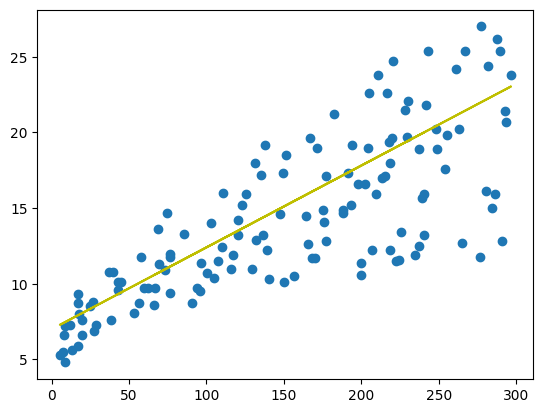

In [45]:
plt.scatter(X_train, y_train)
plt.plot(X_train , 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [46]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

49    -0.538246
63     2.073127
18     0.953267
196   -1.825942
56    -1.927012
         ...   
53     5.504375
140    0.355160
60    -1.506190
195   -1.284514
27    -2.507806
Name: Sales, Length: 134, dtype: float64

In [47]:
y_train_pred

array([10.23824616, 11.92687338, 10.34673339, 11.52594234,  7.42701202,
       14.03058215, 20.57283341, 16.96917085, 20.35585896, 12.88910788,
       12.55421254, 13.26645475, 19.12948165,  9.7948636 , 17.57292584,
       14.14850304, 18.55402769, 15.43148238, 20.4926472 , 17.73329826,
       14.84187791, 12.26176872, 20.14360135, 10.20051148, 18.28045121,
       17.14841062,  8.43169805, 18.37007109, 12.14856466, 15.3418625 ,
       12.61081457, 17.38425241,  8.37981285,  7.89397877,  7.48833089,
       19.05401228, 13.70040364, 14.46924788,  9.1109224 , 10.68162873,
       13.45984502,  7.70530533, 13.18626854, 20.79452469,  8.82319542,
       17.35123455, 18.48327515, 10.68634556, 17.64839521, 20.74735633,
        8.346795  , 16.63427551, 17.47387229,  8.00718283, 10.68634556,
       16.50692095, 18.40780578,  7.33739214, 13.58719958, 13.01174561,
       12.30422024,  7.49304772,  7.6345528 , 16.50692095, 10.3089987 ,
       17.28991569, 11.59669487, 20.93131293,  7.99774915, 13.64

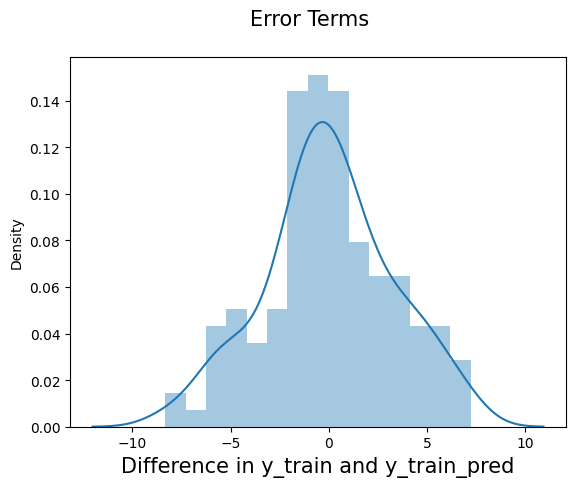

In [48]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms' , fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

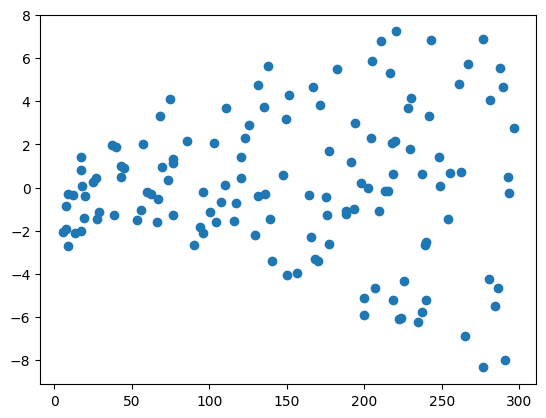

In [49]:
plt.scatter(X_train, res)
plt.show()

In [50]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [51]:
y_pred

array([15.21922477, 10.64389404, 17.02105605, 18.39365527, 16.84181629,
       17.57292584, 19.99266261, 17.15312745,  9.3609147 , 16.29938017,
       14.78527588, 10.86558532, 17.48330596, 17.30878303, 11.66744741,
       20.29925693, 10.28069768, 14.79470955, 18.31818589,  8.20528993,
        7.27607328, 11.19576383,  8.29019297,  7.7005885 ,  9.18167494,
       11.68159792, 15.94090065,  7.96944814, 17.20972948, 18.3983721 ,
       18.91722404, 10.63446037,  7.47889722, 15.61072214,  7.11570086,
        9.44110091, 12.40799063, 11.24764902, 16.4739031 , 13.82304137,
        8.26189196, 10.6250267 , 19.61059891, 16.46446942, 12.79005433,
       10.77124861, 10.33729971, 15.80411241, 16.40315056, 17.85121915,
       18.03045891, 11.51179183,  7.9647313 , 15.80411241, 13.747572  ,
       11.31368473, 10.41276909, 13.41739349,  8.87508061, 12.26176872,
       13.65323528, 20.45962935, 17.79933396, 19.48324434, 13.66266896,
        8.56848629])

In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [53]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.1834934866552294

In [54]:
r2 = r2_score(y_test, y_pred)
r2

0.6148519806850912

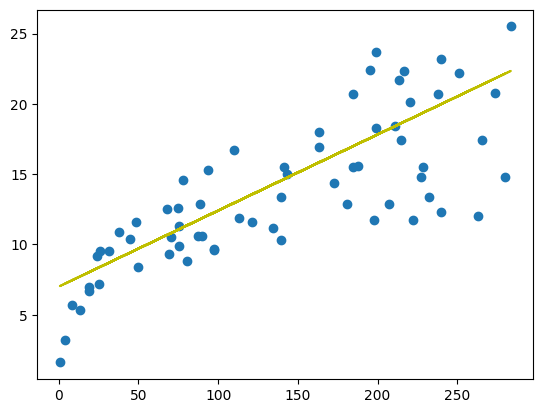

In [55]:
plt.scatter(X_test, y_test)
plt.plot(X_test , 6.9955 + 0.0541 * X_test,'y')
plt.show()